# 1. Import Libraries to Use

In [430]:
# 
# Import library modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 2. Load Data

In [431]:
# 
# Load dataset
loan_eligibility_df = pd.read_csv('../data/loan_data.csv')

In [432]:
# 
# View DataFrame sample
loan_eligibility_df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
47,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
315,LP002031,Male,Yes,1,Not Graduate,No,3399,1640.0,111.0,180.0,1.0,Urban,Y
294,LP001947,Male,Yes,0,Graduate,No,2383,3334.0,172.0,360.0,1.0,Semiurban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
376,LP002219,Male,Yes,3+,Graduate,No,8750,4996.0,130.0,360.0,1.0,Rural,Y
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
526,LP002705,Male,Yes,0,Graduate,No,3775,0.0,110.0,360.0,1.0,Semiurban,Y
249,LP001825,Male,Yes,0,Graduate,No,1809,1868.0,90.0,360.0,1.0,Urban,Y
195,LP001665,Male,Yes,1,Graduate,No,3125,2583.0,170.0,360.0,1.0,Semiurban,N


In [433]:
loan_eligibility_df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [434]:
# 
# Remove '+' sign to have consistency i.e., '3+' to '3'
loan_eligibility_df['Dependents'] = loan_eligibility_df['Dependents'].replace('3+', '3').astype(float)
loan_eligibility_df['Dependents'].unique()

array([ 0.,  1.,  2.,  3., nan])

# 3. Data Cleaning and Preprocessing

## 3.1. Check for Null values and impute them appropriately

In [435]:
# 
# Check for number of rows and data types for each column
loan_eligibility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [436]:
# 
# Check for null count in each column
loan_eligibility_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [437]:
# 
# Percentage of null values compared to total rows
# Gender - 2.12
# Married - 0.49
# Dependents - 2.44 
# Self_Employed - 5.21
# LoanAmount - 3.58
# Loan_Amount_Term - 2.28
# Credit_History - 8.14

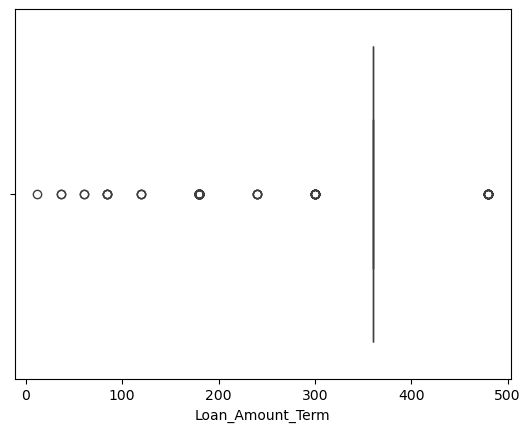

In [438]:
sns.boxplot(x = loan_eligibility_df['Loan_Amount_Term'])
plt.show()

In [439]:
loan_eligibility_df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

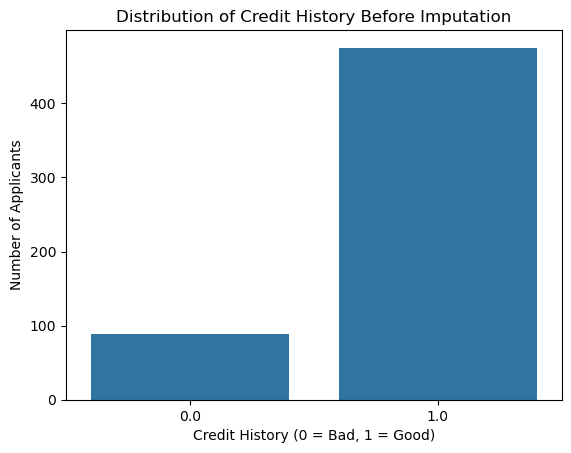

In [440]:
sns.countplot(x='Credit_History', data=loan_eligibility_df)
plt.title("Distribution of Credit History Before Imputation")
plt.xlabel("Credit History (0 = Bad, 1 = Good)")
plt.ylabel("Number of Applicants")
plt.show()

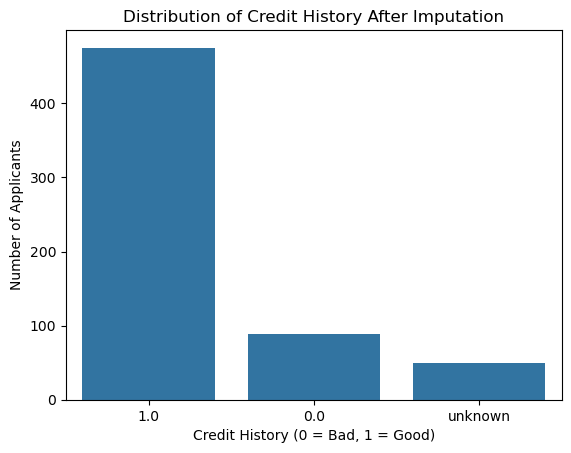

In [441]:
loan_eligibility_df2 = loan_eligibility_df.copy()
loan_eligibility_df2['Credit_History'] = loan_eligibility_df2['Credit_History'].fillna('unknown')
sns.countplot(x='Credit_History', data=loan_eligibility_df2)
plt.title("Distribution of Credit History After Imputation")
plt.xlabel("Credit History (0 = Bad, 1 = Good)")
plt.ylabel("Number of Applicants")
plt.show()

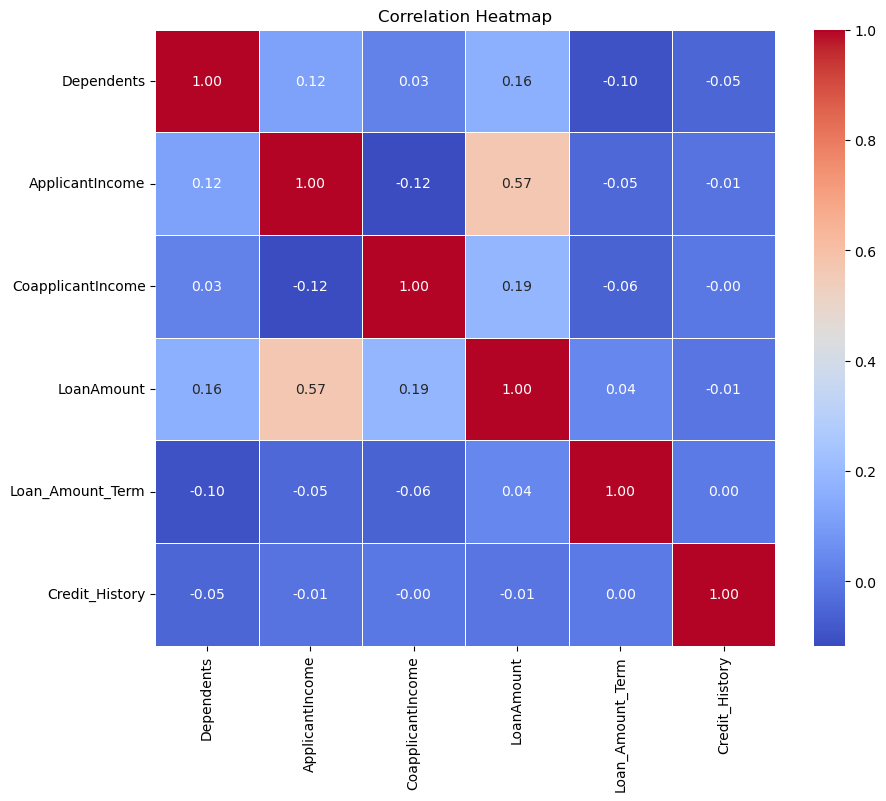

In [442]:
# Select only numeric columns (heatmap works with numbers only)
numeric_df = loan_eligibility_df.select_dtypes(include=['float64', 'int64'])
# 
# Calculate correlation matrix
corr_matrix = numeric_df.corr()
# 
# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [443]:
# 
# Percentage of null values compared to total rows and the solutions
# Gender    --> impute with mode since they are categorical values
# Married    --> impute with mode since they are categorical values
# Dependents    --> impute with mode then we'll use a function to change from string/object to float 
# Self_Employed    --> impute with mode since they are categorical values
# LoanAmount    --> impute with median because the mean will be distorted toward the outliers
# Loan_Amount_Term    --> impute using the mode amount since the column has fixed values 
# Credit_History    --> impute with 'unknown' because after visualization we noticed that the '1s' are significantly more and wouldn't alter the distribution as much. 

In [444]:
# 
# Impute 'Gender' column with mode
loan_eligibility_df['Gender'] = loan_eligibility_df['Gender'].fillna(loan_eligibility_df['Gender'].mode()[0])
# 
# Impute 'Married' column with mode
loan_eligibility_df['Married'] = loan_eligibility_df['Married'].fillna(loan_eligibility_df['Married'].mode()[0])
# 
# Impute 'Dependents' column with median since mean will give a float (e.g., there can't be 3.6 dependents) and mode can be zero hence skewing it toward that end
loan_eligibility_df['Dependents'] = loan_eligibility_df['Dependents'].fillna(loan_eligibility_df['Dependents'].median())
# 
# Impute 'Dependents' column with mode
loan_eligibility_df['Self_Employed'] = loan_eligibility_df['Self_Employed'].fillna(loan_eligibility_df['Self_Employed'].mode()[0])
# 
# Impute 'LoanAmount' column with median
loan_eligibility_df['LoanAmount'] = loan_eligibility_df['Self_Employed'].fillna(loan_eligibility_df['LoanAmount'].median())
# 
# Impute 'Loan_Amount_Term' column with mode
loan_eligibility_df['Loan_Amount_Term'] = loan_eligibility_df['Loan_Amount_Term'].fillna(loan_eligibility_df['Loan_Amount_Term'].mode()[0])
# 
# Impute 'Credit_History' column with 'unknown' because there's a possibility of not knowing an applicant's credit history
loan_eligibility_df['Credit_History'] = loan_eligibility_df['Credit_History'].fillna('unknown')
loan_eligibility_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [445]:
loan_eligibility_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,No,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,No,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,Yes,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,No,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,No,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,No,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,No,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,No,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,No,360.0,1.0,Urban,Y


## 3.2. Drop Loan_ID column

In [446]:
loan_eligibility_df = loan_eligibility_df.drop(['Loan_ID'], axis=1)
loan_eligibility_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,No,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,No,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,Yes,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,No,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,No,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,No,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,No,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,No,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,No,360.0,1.0,Urban,Y


## 3.3.  Convert categorical variables into a suitable format for analysis

In [447]:
# 
# Convert 'Dependents' column to integer
loan_eligibility_df['Dependents'] = loan_eligibility_df['Dependents'].astype(int)
# 
# Check if column changed data type
loan_eligibility_df['Dependents'].unique()

array([0, 1, 2, 3])

### 3.3.2. One Hot Encoding

DataFrame before Hot Encoding

In [448]:
loan_eligibility_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,No,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,No,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,Yes,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,No,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,No,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,No,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,No,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,No,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,No,360.0,1.0,Urban,Y


In [449]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns=['Gender'], prefix = 'Gender', dtype = int)
loan_eligibility_df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,No,0,Graduate,No,5849,0.0,No,360.0,1.0,Urban,Y,0,1
1,Yes,1,Graduate,No,4583,1508.0,No,360.0,1.0,Rural,N,0,1
2,Yes,0,Graduate,Yes,3000,0.0,Yes,360.0,1.0,Urban,Y,0,1
3,Yes,0,Not Graduate,No,2583,2358.0,No,360.0,1.0,Urban,Y,0,1
4,No,0,Graduate,No,6000,0.0,No,360.0,1.0,Urban,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,No,360.0,1.0,Rural,Y,1,0
610,Yes,3,Graduate,No,4106,0.0,No,180.0,1.0,Rural,Y,0,1
611,Yes,1,Graduate,No,8072,240.0,No,360.0,1.0,Urban,Y,0,1
612,Yes,2,Graduate,No,7583,0.0,No,360.0,1.0,Urban,Y,0,1


In [450]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Married'], prefix = 'Married', dtype = int)

In [451]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Dependents'], prefix = 'Dependents', dtype = int)

In [452]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Self_Employed'], prefix = 'Self_Employed', dtype = int)

In [453]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Credit_History'], prefix = 'Credit_History', dtype = int)

In [454]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Property_Area'], prefix = 'Property_Area', dtype = int)

In [455]:
loan_eligibility_df = pd.get_dummies(loan_eligibility_df, columns = ['Loan_Status'], prefix = 'Loan_Status', dtype = int)

DataFrame after One Hot Encoding

In [456]:
loan_eligibility_df

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_unknown,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,Graduate,5849,0.0,No,360.0,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,Graduate,4583,1508.0,No,360.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
2,Graduate,3000,0.0,Yes,360.0,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,1
3,Not Graduate,2583,2358.0,No,360.0,0,1,0,1,1,...,1,0,0,1,0,0,0,1,0,1
4,Graduate,6000,0.0,No,360.0,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Graduate,2900,0.0,No,360.0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
610,Graduate,4106,0.0,No,180.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
611,Graduate,8072,240.0,No,360.0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
612,Graduate,7583,0.0,No,360.0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1


### 3.3.3. Label Encoding Ordinal Columns

In [457]:
loan_eligibility_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [458]:
# 
# Since Label Encoder by default assigns labels alphabetically (e.g., 'Graduate' = 0 and 'Not Graduate' = 1) we first map the values to (e.g., 'B_Graduate' = 0 and 'A_Not Graduate')
loan_eligibility_df['Education'] = loan_eligibility_df['Education'].map({
    'Graduate': 'B_Graduate',
    'Not Graduate': 'A_Not Graduate'
})
lbl_encoder = LabelEncoder()
loan_eligibility_df['Education'] = lbl_encoder.fit_transform(loan_eligibility_df['Education'])
loan_eligibility_df

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_unknown,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,1,5849,0.0,No,360.0,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,4583,1508.0,No,360.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
2,1,3000,0.0,Yes,360.0,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,1
3,0,2583,2358.0,No,360.0,0,1,0,1,1,...,1,0,0,1,0,0,0,1,0,1
4,1,6000,0.0,No,360.0,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,2900,0.0,No,360.0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
610,1,4106,0.0,No,180.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
611,1,8072,240.0,No,360.0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
612,1,7583,0.0,No,360.0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1


## 3.4. Check for outliers and treat them

In [460]:
loan_eligibility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                614 non-null    int64  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    object 
 4   Loan_Amount_Term         614 non-null    float64
 5   Gender_Female            614 non-null    int64  
 6   Gender_Male              614 non-null    int64  
 7   Married_No               614 non-null    int64  
 8   Married_Yes              614 non-null    int64  
 9   Dependents_0             614 non-null    int64  
 10  Dependents_1             614 non-null    int64  
 11  Dependents_2             614 non-null    int64  
 12  Dependents_3             614 non-null    int64  
 13  Self_Employed_No         614 non-null    int64  
 14  Self_Employed_Yes        6